### AAI-590 | Final Capstone Project | Applied Artificial Intelligence
#### Zachary Artman, Olga Pospelova, Nabeel Khan, Samantha Colbert-Neal


In [13]:
## Imports
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
path = kagglehub.dataset_download("mohamedmaideen/zillow-com-house-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 15.5M/15.5M [00:01<00:00, 12.5MB/s]

Extracting files...


Path to dataset files: /Users/zacharyartman/.cache/kagglehub/datasets/mohamedmaideen/zillow-com-house-price-prediction/versions/1


In [6]:
df = pd.read_excel(f"{path}/Zillow.com House Price Prediction Data.xlsx")

In [7]:
df.head()

,contact_recipients,longitude,countyFIPS,imgSrc,livingAreaValue,streetAddress,county,monthlyHoaFee,timeZone,taxHistory,...,mlsid,listingSubType,pageViewCount,buildingId,country,homeType,solarPotential,contingentListingType,message,resoFacts.daysOnZillow
0,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90807,2020.0,https://photos.zillowstatic.com/fp/ce047439c86...,2668.0,500 North St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1691996796990, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",12925.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
1,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90822,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3179.0,520 N St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1692004111174, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
2,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90833,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3059.0,522 N St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1691999146138, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",21.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
3,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN
4,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90834,2020.0,https://photos.zillowstatic.com/fp/10602cde74a...,1642.0,530 North St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1692004364225, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN


In [8]:
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Dataset Shape:
Rows: 7160
Columns: 67


In [9]:
print("Column Names:")
print(df.columns.tolist())

Column Names:
['contact_recipients', 'longitude', 'countyFIPS', 'imgSrc', 'livingAreaValue', 'streetAddress', 'county', 'monthlyHoaFee', 'timeZone', 'taxHistory', 'dateSold', 'annualHomeownersInsurance', 'state', 'listed_by', 'yearBuilt', 'brokerageName', 'description', 'latitude', 'nearbyHomes', 'priceHistory', 'schools', 'rentZestimate', 'city', 'providerListingID', 'currency', 'listingProvider', 'zestimateLowPercent', 'openHouseSchedule', 'mortgageRates', 'address', 'cityId', 'timeOnZillow', 'url', 'zestimate', 'zpid', 'countyId', 'brokerId', 'livingAreaUnits', 'comingSoonOnMarketDate', 'livingArea', 'building', 'stateId', 'zipcode', 'propertyTaxRate', 'attributionInfo', 'bathrooms', 'homeStatus', 'homeFacts', 'resoFacts', 'datePosted', 'bedrooms', 'propertyTypeDimension', 'mortgageZHLRates', 'price', 'favoriteCount', 'isListedByOwner', 'zestimateHighPercent', 'mlsid', 'listingSubType', 'pageViewCount', 'buildingId', 'country', 'homeType', 'solarPotential', 'contingentListingType', 

In [10]:
print("Data Types:")
df.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   contact_recipients         7160 non-null   object 
 1   longitude                  6042 non-null   float64
 2   countyFIPS                 5896 non-null   float64
 3   imgSrc                     6043 non-null   object 
 4   livingAreaValue            5869 non-null   float64
 5   streetAddress              6043 non-null   object 
 6   county                     5995 non-null   object 
 7   monthlyHoaFee              1161 non-null   float64
 8   timeZone                   6043 non-null   object 
 9   taxHistory                 6043 non-null   object 
 10  dateSold                   221 non-null    object 
 11  annualHomeownersInsurance  7160 non-null   int64  
 12  state                      6043 non-null   object 
 13  listed_by                  7160 non-

### Missing Values


In [11]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("Missing Values Summary:")
print(missing_df)


Missing Values Summary:
                        Missing_Count  Missing_Percent
resoFacts.daysOnZillow           7160       100.000000
solarPotential                   7160       100.000000
homeFacts                        7160       100.000000
comingSoonOnMarketDate           7160       100.000000
brokerId                         7160       100.000000
contingentListingType            7160       100.000000
message                          7160       100.000000
building                         7149        99.846369
providerListingID                7143        99.762570
isListedByOwner                  7111        99.315642
dateSold                         6939        96.913408
mlsid                            6465        90.293296
brokerageName                    6459        90.209497
datePosted                       6448        90.055866
monthlyHoaFee                    5999        83.784916
buildingId                       5946        83.044693
mortgageZHLRates                 1997    

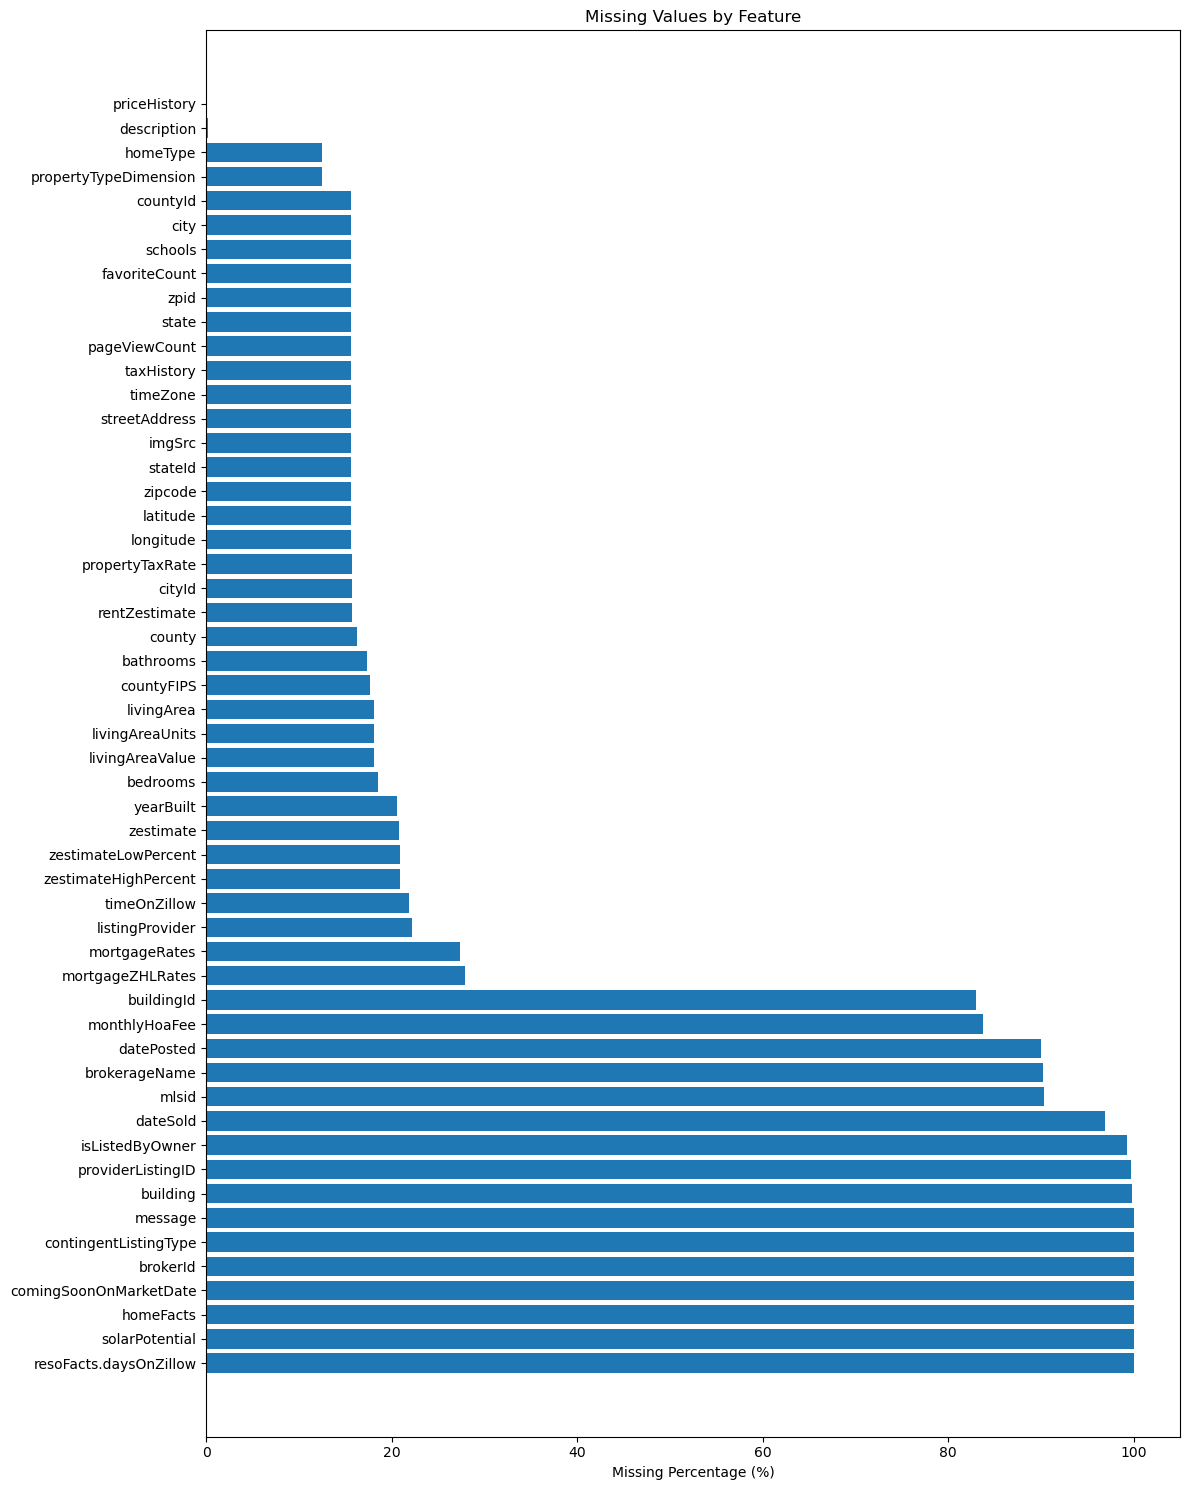

In [17]:
plt.figure(figsize=(12, 15))
plt.barh(missing_df.index, missing_df['Missing_Percent'])
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Values by Feature')
plt.tight_layout()
plt.show()

In [18]:
print("Price Statistics:")
print(df['price'].describe())


Price Statistics:
count    7.160000e+03
mean     2.885633e+05
std      2.368257e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.156000e+05
75%      4.294000e+05
max      2.750000e+06
Name: price, dtype: float64


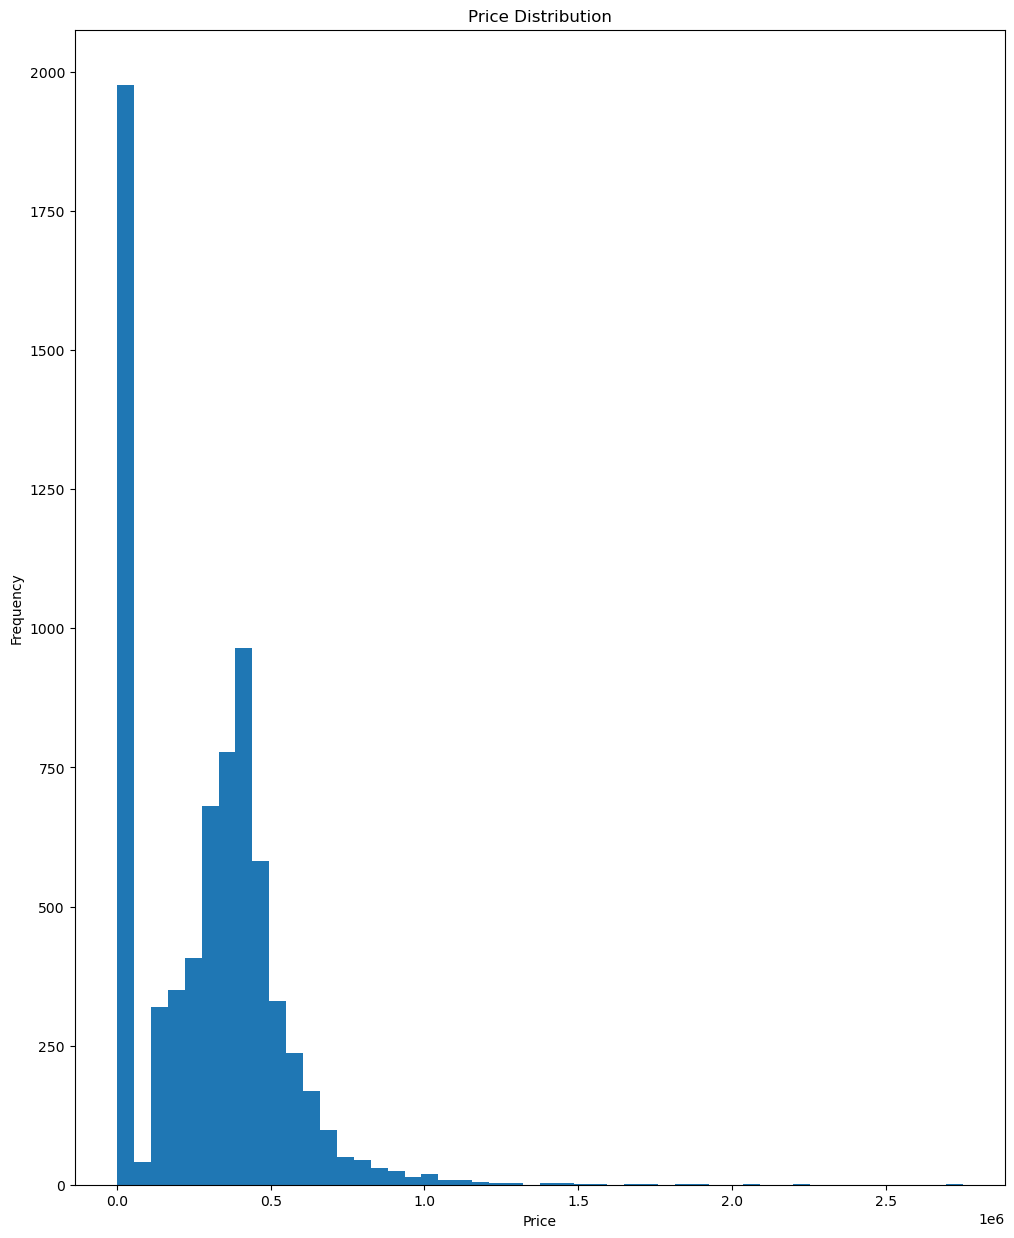

In [22]:
plt.figure(figsize=(12, 15))
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

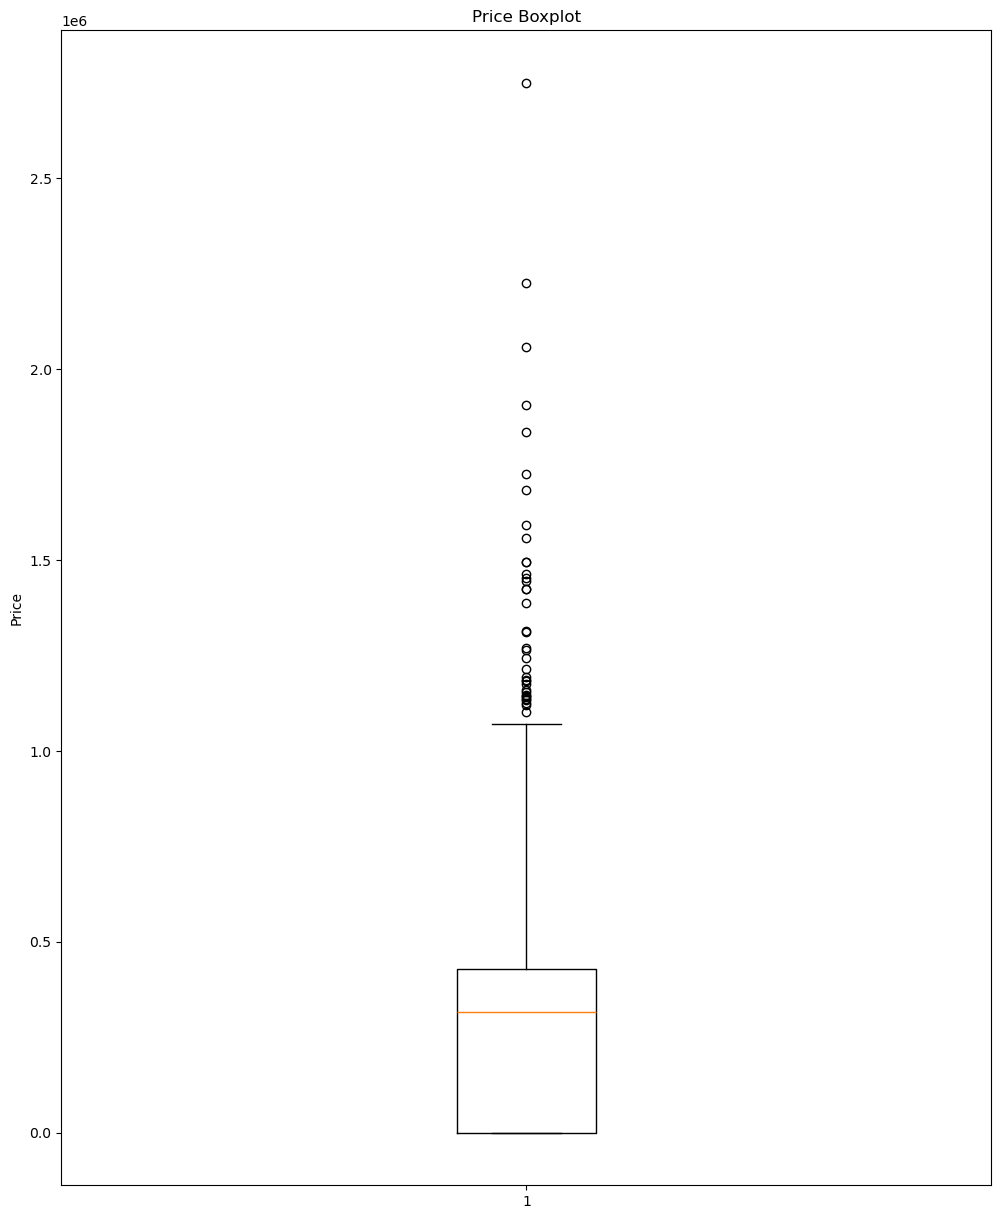

In [23]:
plt.figure(figsize=(12, 15))
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Price Boxplot')
plt.show()

In [25]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Number of numerical features: {len(numerical_cols)}")
print("\nNumerical columns:")
print(numerical_cols)


Number of numerical features: 31

Numerical columns:
['longitude', 'countyFIPS', 'livingAreaValue', 'monthlyHoaFee', 'annualHomeownersInsurance', 'yearBuilt', 'latitude', 'rentZestimate', 'zestimateLowPercent', 'cityId', 'zestimate', 'zpid', 'countyId', 'brokerId', 'comingSoonOnMarketDate', 'livingArea', 'stateId', 'propertyTaxRate', 'bathrooms', 'homeFacts', 'bedrooms', 'price', 'favoriteCount', 'isListedByOwner', 'zestimateHighPercent', 'pageViewCount', 'buildingId', 'solarPotential', 'contingentListingType', 'message', 'resoFacts.daysOnZillow']


In [26]:
print("Statistical Summary of Numerical Features:")
df[numerical_cols].describe()

Statistical Summary of Numerical Features:


,longitude,countyFIPS,livingAreaValue,monthlyHoaFee,annualHomeownersInsurance,yearBuilt,latitude,rentZestimate,zestimateLowPercent,cityId,...,price,favoriteCount,isListedByOwner,zestimateHighPercent,pageViewCount,buildingId,solarPotential,contingentListingType,message,resoFacts.daysOnZillow
count,6042.000000,5896.000000,5869.000000,1161.000000,7160.000000,5690.000000,6042.000000,6034.000000,5662.000000,6035.000000,...,7.160000e+03,6043.000000,49.0,5662.000000,6043.000000,1.214000e+03,0.0,0.0,0.0,0.0
mean,-145.749918,3232.119742,1795.795025,287.714040,1211.979888,1976.310545,59.585590,2593.182963,9.747969,25628.359735,...,2.885633e+05,0.815489,0.0,9.862769,17.600199,1.475657e+09,NaN,NaN,NaN,NaN
std,15.835762,6468.792955,1532.936783,1352.210988,994.675514,13.387253,6.073109,763.919618,2.787896,35318.708325,...,2.368257e+05,10.256293,0.0,3.263507,226.789666,5.637526e+08,NaN,NaN,NaN,NaN
min,-158.757920,1031.000000,0.000000,4.000000,0.000000,1880.000000,18.073723,693.000000,5.000000,3436.000000,...,0.000000e+00,0.000000,0.0,5.000000,0.000000,3.322900e+04,NaN,NaN,NaN,NaN
25%,-149.925387,2020.000000,1141.000000,103.000000,0.000000,1970.000000,61.143157,2080.000000,8.000000,23482.000000,...,0.000000e+00,0.000000,0.0,8.000000,0.000000,1.003408e+09,NaN,NaN,NaN,NaN
50%,-149.859490,2020.000000,1670.000000,271.000000,1326.000000,1977.000000,61.163494,2570.000000,9.000000,23482.000000,...,3.156000e+05,0.000000,0.0,9.000000,1.000000,1.047348e+09,NaN,NaN,NaN,NaN
75%,-149.805183,2020.000000,2128.000000,350.000000,1803.000000,1983.000000,61.196480,2990.750000,11.000000,23482.000000,...,4.294000e+05,0.000000,0.0,11.000000,2.000000,2.088126e+09,NaN,NaN,NaN,NaN
max,-66.049990,56001.000000,95337.000000,45929.000000,11550.000000,2023.000000,61.231228,11544.000000,38.000000,839846.000000,...,2.750000e+06,369.000000,0.0,59.000000,12925.000000,2.734416e+09,NaN,NaN,NaN,NaN


In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Number of categorical features: {len(categorical_cols)}")
print("\nCategorical columns:")
print(categorical_cols)


Number of categorical features: 36

Categorical columns:
['contact_recipients', 'imgSrc', 'streetAddress', 'county', 'timeZone', 'taxHistory', 'dateSold', 'state', 'listed_by', 'brokerageName', 'description', 'nearbyHomes', 'priceHistory', 'schools', 'city', 'providerListingID', 'currency', 'listingProvider', 'openHouseSchedule', 'mortgageRates', 'address', 'timeOnZillow', 'url', 'livingAreaUnits', 'building', 'zipcode', 'attributionInfo', 'homeStatus', 'resoFacts', 'datePosted', 'propertyTypeDimension', 'mortgageZHLRates', 'mlsid', 'listingSubType', 'country', 'homeType']


In [28]:
print("Unique values in each categorical feature:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")


Unique values in each categorical feature:

contact_recipients: 373 unique values

imgSrc: 5902 unique values

streetAddress: 6042 unique values

county: 223 unique values

timeZone: 10 unique values

taxHistory: 5631 unique values

dateSold: 162 unique values

state: 50 unique values

listed_by: 298 unique values

brokerageName: 101 unique values

description: 6023 unique values

nearbyHomes: 5903 unique values

priceHistory: 5883 unique values

schools: 2878 unique values

city: 298 unique values

providerListingID: 17 unique values

currency: 2 unique values

listingProvider: 23 unique values

openHouseSchedule: 4 unique values

mortgageRates: 65 unique values

address: 6044 unique values

timeOnZillow: 2915 unique values

url: 6044 unique values

livingAreaUnits: 1 unique values

building: 11 unique values

zipcode: 371 unique values

attributionInfo: 718 unique values

homeStatus: 7 unique values

resoFacts: 6039 unique values

datePosted: 482 unique values

propertyTypeDimension:

In [29]:
correlations_with_price = df[numerical_cols].corr()['price'].sort_values(ascending=False)
print("Correlation with Price:")
print(correlations_with_price)


Correlation with Price:
price                        1.000000
annualHomeownersInsurance    1.000000
zestimate                    0.808086
rentZestimate                0.627407
bathrooms                    0.473468
bedrooms                     0.413772
livingArea                   0.382270
livingAreaValue              0.382270
latitude                     0.210386
zestimateHighPercent         0.097211
buildingId                   0.090469
yearBuilt                    0.085402
propertyTaxRate              0.056277
pageViewCount                0.029779
favoriteCount                0.028089
zestimateLowPercent          0.022267
countyId                    -0.046307
stateId                     -0.049232
monthlyHoaFee               -0.065573
cityId                      -0.074086
countyFIPS                  -0.212619
longitude                   -0.215921
zpid                        -0.225246
brokerId                          NaN
comingSoonOnMarketDate            NaN
homeFacts                 

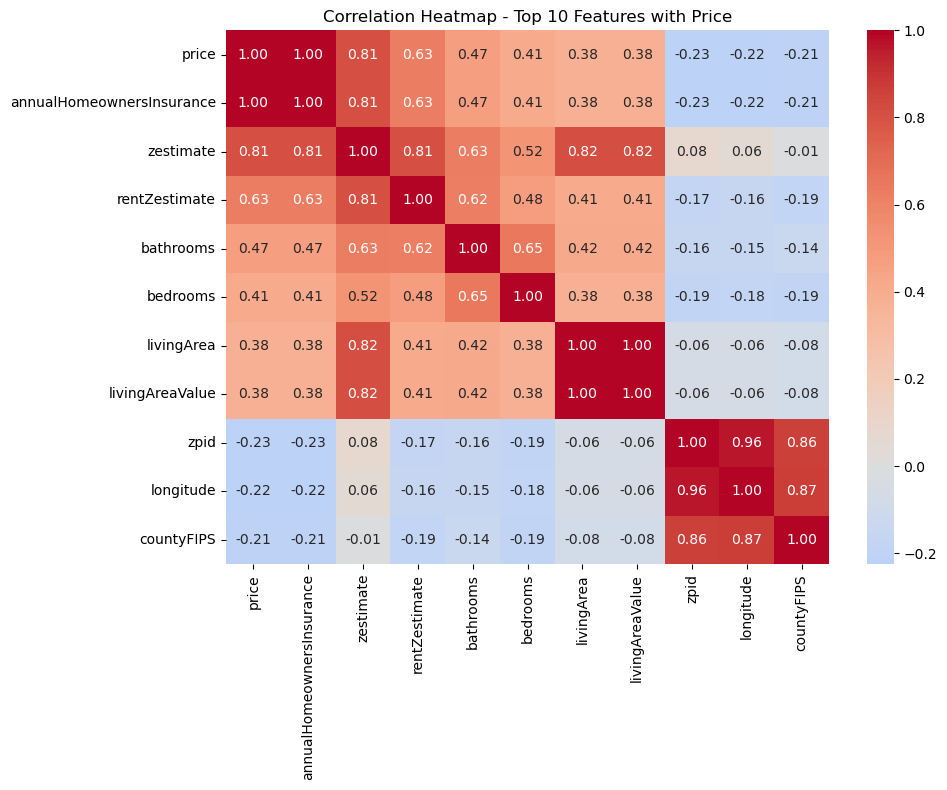

In [30]:
top_corr_features = correlations_with_price.abs().sort_values(ascending=False).head(11).index
correlation_matrix = df[top_corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Top 10 Features with Price')
plt.tight_layout()
plt.show()


In [31]:
print("Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("\n\nZero or Negative Prices:")
invalid_prices = df[df['price'] <= 0]
print(f"Number of rows with invalid prices: {len(invalid_prices)}")


Duplicate Rows:
Number of duplicate rows: 1114


Zero or Negative Prices:
Number of rows with invalid prices: 1955


### Eda Key Findinfs

In [36]:
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print(f"Numerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")

print("\nData Quality:")
print(f"Duplicate Rows: {duplicates}")
print(f"Features with Missing Values: {len(missing_df)}")
print(f"Invalid Price Records: {len(invalid_prices)}")

print("\nTarget Variable - Price:")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")

Total Records: 7160
Total Features: 67
Numerical Features: 31
Categorical Features: 36

Data Quality:
Duplicate Rows: 1114
Features with Missing Values: 53
Invalid Price Records: 1955

Target Variable - Price:
Mean: $288,563.30
Median: $315,600.00
Min: $0.00
Max: $2,750,000.00


## Pre processing

In [62]:
df_clean = df.copy()
print(f"Starting with {len(df_clean)} records")


Starting with 7160 records


In [ ]:
print(f"Records with invalid prices (<=0): {len(df_clean[df_clean['price'] <= 0])}")
df_clean = df_clean[df_clean['price'] > 0]
print(f"After removal: {len(df_clean)} records remaining")

Records with invalid prices (<=0): 1955
After removal: 5205 records remaining


In [ ]:
missing_100_pct = df_clean.columns[df_clean.isnull().sum() == len(df_clean)]
print(f"Columns with 100% missing values: {len(missing_100_pct)}")
print(f"Columns: {list(missing_100_pct)}")

df_clean = df_clean.drop(columns=missing_100_pct)
print(f"\nAfter removal: {df_clean.shape[1]} columns remaining")

Columns with 100% missing values: 7
Columns: ['brokerId', 'comingSoonOnMarketDate', 'homeFacts', 'solarPotential', 'contingentListingType', 'message', 'resoFacts.daysOnZillow']

After removal: 60 columns remaining


In [65]:
print("Dropping 'annualHomeownersInsurance' since it has perfect correlation with price")
df_clean = df_clean.drop(columns=['annualHomeownersInsurance'])

Dropping 'annualHomeownersInsurance' since it has perfect correlation with price


In [66]:
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
high_missing_cols = missing_pct[missing_pct > 80].index.tolist()

print(f"Columns with >80% missing values: {len(high_missing_cols)}")
print(f"Columns: {high_missing_cols}")

df_clean = df_clean.drop(columns=high_missing_cols)
print(f"\nAfter removal: {df_clean.shape[1]} columns remaining")


Columns with >80% missing values: 9
Columns: ['monthlyHoaFee', 'dateSold', 'brokerageName', 'providerListingID', 'building', 'datePosted', 'isListedByOwner', 'mlsid', 'buildingId']

After removal: 50 columns remaining


In [67]:
remaining_missing = df_clean.isnull().sum()
remaining_missing_pct = (remaining_missing / len(df_clean)) * 100
remaining_missing_df = pd.DataFrame({
    'Missing_Count': remaining_missing,
    'Missing_Percent': remaining_missing_pct
})
remaining_missing_df = remaining_missing_df[remaining_missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Remaining columns with missing values:")
print(remaining_missing_df)


Remaining columns with missing values:
                      Missing_Count  Missing_Percent
timeOnZillow                    202         3.880884
bedrooms                        135         2.593660
listingProvider                 129         2.478386
yearBuilt                       123         2.363112
bathrooms                        96         1.844380
zestimateHighPercent             78         1.498559
zestimateLowPercent              78         1.498559
zestimate                        77         1.479347
countyFIPS                       66         1.268012
livingAreaValue                  57         1.095101
livingAreaUnits                  57         1.095101
livingArea                       57         1.095101
county                           42         0.806916
mortgageZHLRates                 42         0.806916
description                       5         0.096061
cityId                            3         0.057637
longitude                         1         0.019212
propert

In [68]:
print(f"Before handling missing values: {len(df_clean)} records")

critical_features = ['bedrooms', 'bathrooms', 'livingArea', 'yearBuilt', 'latitude', 'longitude']
existing_critical = [col for col in critical_features]

print(f"\nDropping rows with missing critical features: {existing_critical}")
for col in existing_critical:
    missing_before = df_clean[col].isnull().sum()
    df_clean = df_clean[df_clean[col].notna()]
    print(f"  {col}: removed {missing_before} rows")

print(f"\nAfter handling missing values: {len(df_clean)} records remaining")


Before handling missing values: 5205 records

Dropping rows with missing critical features: ['bedrooms', 'bathrooms', 'livingArea', 'yearBuilt', 'latitude', 'longitude']
  bedrooms: removed 135 rows
  bathrooms: removed 0 rows
  livingArea: removed 20 rows
  yearBuilt: removed 48 rows
  latitude: removed 0 rows
  longitude: removed 0 rows

After handling missing values: 5002 records remaining


In [70]:
remaining_after_critical = df_clean.isnull().sum()
remaining_pct = (remaining_after_critical / len(df_clean)) * 100
remaining_df = pd.DataFrame({
    'Missing_Count': remaining_after_critical,
    'Missing_Percent': remaining_pct
})
remaining_df = remaining_df[remaining_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing values remaining after handling critical features:")
print(remaining_df)

Missing values remaining after handling critical features:
                      Missing_Count  Missing_Percent
timeOnZillow                    159         3.178729
listingProvider                 118         2.359056
zestimateLowPercent              56         1.119552
zestimateHighPercent             56         1.119552
zestimate                        55         1.099560
county                           39         0.779688
mortgageZHLRates                 39         0.779688
countyFIPS                       23         0.459816
cityId                            2         0.039984


In [71]:
location_cols = ['county', 'countyFIPS', 'cityId']
existing_location = [col for col in location_cols]

print(f"Dropping rows with missing location data: {existing_location}")
for col in existing_location:
    missing_before = df_clean[col].isnull().sum()
    df_clean = df_clean[df_clean[col].notna()]
    print(f"  {col}: removed {missing_before} rows")

print(f"\nRecords after location cleanup: {len(df_clean)}")


Dropping rows with missing location data: ['county', 'countyFIPS', 'cityId']
  county: removed 39 rows
  countyFIPS: removed 23 rows
  cityId: removed 2 rows

Records after location cleanup: 4938


In [72]:
non_critical_cols = ['timeOnZillow', 'listingProvider', 'mortgageZHLRates']
existing_non_critical = [col for col in non_critical_cols]

df_clean = df_clean.drop(columns=existing_non_critical)
print(f"Columns remaining: {df_clean.shape[1]}")


Columns remaining: 47


In [74]:
zestimate_cols = ['zestimate', 'zestimateLowPercent', 'zestimateHighPercent']
existing_zestimate = [col for col in zestimate_cols]

print(f"\nHandling Zestimate columns: {existing_zestimate}")
print("Drop rows with missing zestimate values")

for col in existing_zestimate:
    missing_before = df_clean[col].isnull().sum()
    df_clean = df_clean[df_clean[col].notna()]
    print(f"  {col}: removed {missing_before} rows")

print(f"\nFinal record count: {len(df_clean)}")



Handling Zestimate columns: ['zestimate', 'zestimateLowPercent', 'zestimateHighPercent']
Drop rows with missing zestimate values
  zestimate: removed 54 rows
  zestimateLowPercent: removed 1 rows
  zestimateHighPercent: removed 0 rows

Final record count: 4883


In [75]:
final_check = df_clean.isnull().sum()
final_check_pct = (final_check / len(df_clean)) * 100
final_check_df = pd.DataFrame({
    'Missing_Count': final_check,
    'Missing_Percent': final_check_pct
})
final_check_df = final_check_df[final_check_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("final missing values")
print(final_check_df)

final missing values
Empty DataFrame
Columns: [Missing_Count, Missing_Percent]
Index: []


In [77]:
non_predictive_cols = [
    'url', 'imgSrc', 'description', 'taxHistory', 'priceHistory', 
    'schools', 'nearbyHomes', 'contact_recipients', 'listed_by',
    'streetAddress', 'address', 'zpid', 'attributionInfo',
    'openHouseSchedule', 'mortgageRates', 'resoFacts',
]

cols_to_drop = [col for col in non_predictive_cols]
print(f"Dropping {len(cols_to_drop)} non-predictive columns:")
print(cols_to_drop)

df_clean = df_clean.drop(columns=cols_to_drop)
print(f"\nColumns remaining: {df_clean.shape[1]}")

Dropping 16 non-predictive columns:
['url', 'imgSrc', 'description', 'taxHistory', 'priceHistory', 'schools', 'nearbyHomes', 'contact_recipients', 'listed_by', 'streetAddress', 'address', 'zpid', 'attributionInfo', 'openHouseSchedule', 'mortgageRates', 'resoFacts']

Columns remaining: 31


In [78]:
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('price')

categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"\nNumerical: {numerical_features}")
print(f"\nCategorical: {categorical_features}")


Numerical features: 18
Categorical features: 12

Numerical: ['longitude', 'countyFIPS', 'livingAreaValue', 'yearBuilt', 'latitude', 'rentZestimate', 'zestimateLowPercent', 'cityId', 'zestimate', 'countyId', 'livingArea', 'stateId', 'propertyTaxRate', 'bathrooms', 'bedrooms', 'favoriteCount', 'zestimateHighPercent', 'pageViewCount']

Categorical: ['county', 'timeZone', 'state', 'city', 'currency', 'livingAreaUnits', 'zipcode', 'homeStatus', 'propertyTypeDimension', 'listingSubType', 'country', 'homeType']


In [79]:
print(f"\nOriginal dataset: {df.shape[0]} rows - {df.shape[1]} columns")
print(f"Cleaned dataset: {df_clean.shape[0]} rows - {df_clean.shape[1]} columns")
print(f"\nRows removed: {df.shape[0] - df_clean.shape[0]} ({((df.shape[0] - df_clean.shape[0])/df.shape[0]*100):.1f}%)")
print(f"Columns removed: {df.shape[1] - df_clean.shape[1]}")

print(f"\nFinal feature count:")
print(f"Numerical: {len(numerical_features)}")
print(f"Categorical: {len(categorical_features)}")
print(f"Total: {len(numerical_features) + len(categorical_features)}")

print(f"\nTarget variable: price")
print(f"Records: {df_clean['price'].count()}")
print(f"Mean: ${df_clean['price'].mean():,.2f}")
print(f"Median: ${df_clean['price'].median():,.2f}")
print(f"Range: ${df_clean['price'].min():,.2f} - ${df_clean['price'].max():,.2f}")



Original dataset: 7160 rows - 67 columns
Cleaned dataset: 4883 rows - 31 columns

Rows removed: 2277 (31.8%)
Columns removed: 36

Final feature count:
Numerical: 18
Categorical: 12
Total: 30

Target variable: price
Records: 4883
Mean: $399,499.91
Median: $388,100.00
Range: $1,250.00 - $2,750,000.00


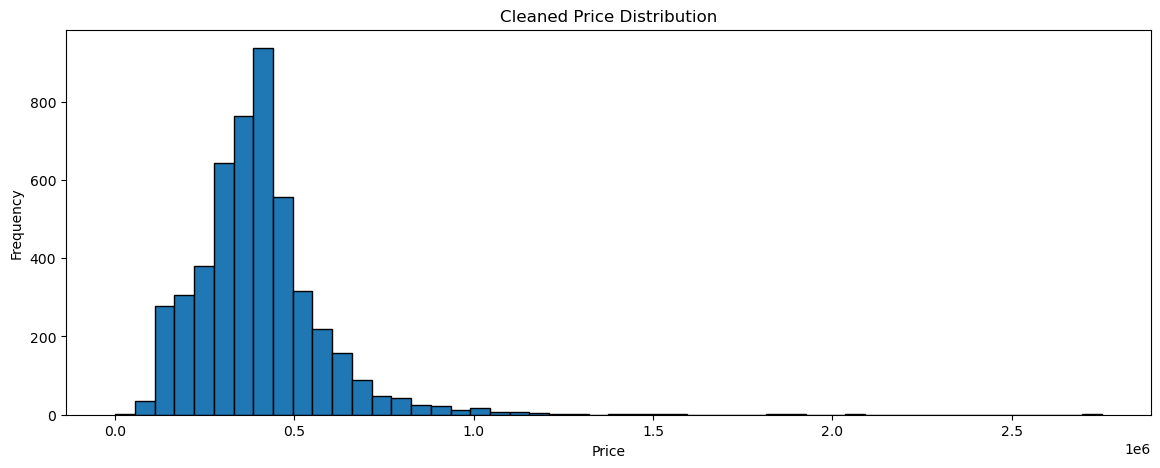

In [81]:
plt.figure(figsize=(14, 5))
plt.hist(df_clean['price'], bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Cleaned Price Distribution')
plt.show()
